# Bike Sharing

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.You must predict the total count of bikes rented using only information available prior to the rental period.

## Content

- Instant: Record index
- Day: Date
- Season: Season (1:springer, 2:summer, 3:fall, 4:winter)
- Year: Year (0: 2011, 1:2012)
- Month: Month (1 to 12)
- Holiday: whether day is holiday or not (extracted from Holiday Schedule)
- Weekday: Day of the week
- Workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
- Weathersit: (extracted from Freemeteo)
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Temperature: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- Temp2: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- Humidity: Normalized humidity. The values are divided to 100 (max)
- Windspeed: Normalized wind speed. The values are divided to 67 (max)
- Casual: count of casual users
- Registered: count of registered users
- Count: count of total rental bikes including both casual and registered

# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns if required.
 - Treating the NaN values in the dataset,if any.
 - #Some Transformations
3. **Data Visualization:** Using plots to find relations between the features.
 - plotting the counts based on the season
 - plotting the counts based on the holidays
 - plotting the counts based on the weather
 - plotting the counts based on the temperature
 - plotting the counts based on the humidity
 - plotting the counts based on the windspeed
 - finding correlation of the whole data
4. **Regression Analysis**
 - Logistic Regression
 - Support Vector Machine Regression
 - KNN Regression
 - Random Forest Regression
 - AdaBoost Regression
 - Gradient Boosting regression
5. **Conclusion**

In [127]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime



In [128]:
# b) Load dataset
startTimeScript = datetime.now()
df = pd.read_csv("BikeSharing.csv")

inputFile = 'BikeSharing.csv'
entireDataset = read_csv(inputFile, na_values="na")


In [129]:
totCol = len(entireDataset.columns)
totAttr = totCol-1


In [130]:
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

In [131]:
entireDataset.head(20)

,Instant,Day,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [132]:
# 2.a.ii) Dimensions of the dataset
print("Number of Rows and Columns in Train Data:", entireDataset.shape)
#print("Number of Rows and Columns in Test Data:", testDataset.shape)


Number of Rows and Columns in Train Data: (731, 16)


In [133]:
# 2.a.iii) Types of the attributes
print(entireDataset.dtypes)


Instant          int64
Day             object
Season           int64
Year             int64
Month            int64
Holiday          int64
Weekday          int64
Workingday       int64
Weathersit       int64
Temperature    float64
Temp2          float64
Humidity       float64
Windspeed      float64
Casual           int64
Registered       int64
Count            int64
dtype: object


In [134]:
# 2.a.iv) Statistical summary of all attributes
Statitical_summary = entireDataset.describe()
Statitical_summary

,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [135]:
# 2.a.v) Count missing values
print(entireDataset.isnull().sum())
#print(testDataset.isnull().sum())

Instant        0
Day            0
Season         0
Year           0
Month          0
Holiday        0
Weekday        0
Workingday     0
Weathersit     0
Temperature    0
Temp2          0
Humidity       0
Windspeed      0
Casual         0
Registered     0
Count          0
dtype: int64


In [136]:
#Dropping unnecessary columns
entireDataset.drop(['Instant','Day', 'Year', 'Casual', 'Registered'],axis=1,inplace=True)

In [137]:
entireDataset.head(2)

,Season,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801


# Visualization

### Univariate Analysis

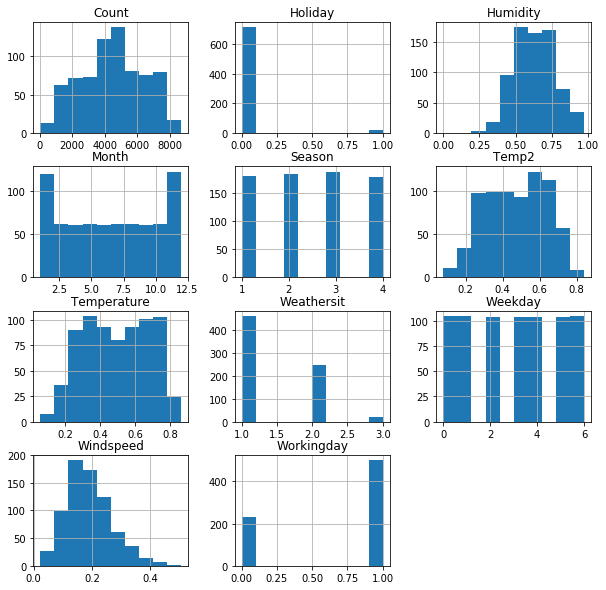

In [138]:
# Histograms for each attribute
entireDataset.hist(figsize = (10,10))
pyplot.show()
#Here we get to see the distribution of data.

### Bivariate Analysis

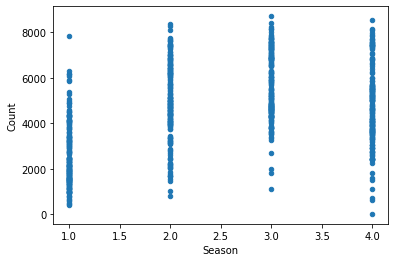

In [139]:
entireDataset.plot.scatter(x ='Season', y ='Count') # plotting the counts based on the season

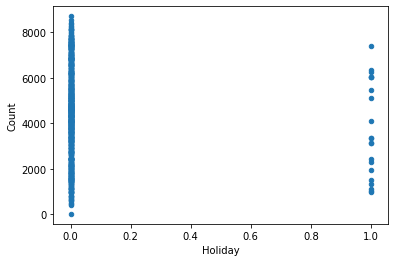

In [140]:
entireDataset.plot.scatter(x = 'Holiday', y = 'Count') # plotting the counts based on the holidays

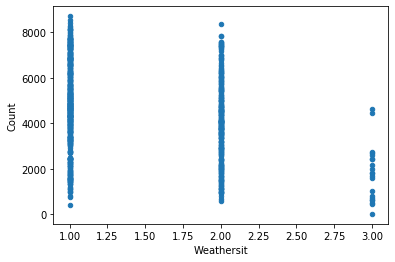

In [141]:
entireDataset.plot.scatter(x = 'Weathersit', y = 'Count') # plotting the counts based on the weather

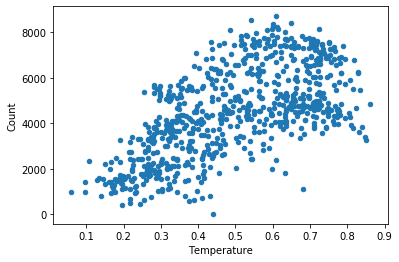

In [142]:
entireDataset.plot.scatter(x = 'Temperature', y = 'Count') # plotting the counts based on the temparature
# count of bikes is increasing with the increase in temperature

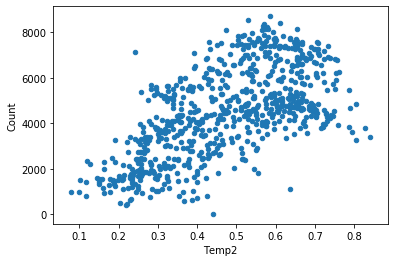

In [143]:
entireDataset.plot.scatter(x = 'Temp2', y = 'Count') # plotting the counts based on atemp

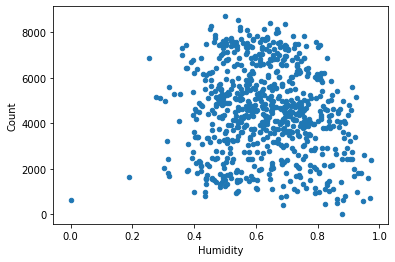

In [144]:
entireDataset.plot.scatter(x = 'Humidity', y = 'Count')# plotting the counts based on humidity
# Count of bikes may increase or decrease with increase in Humidity

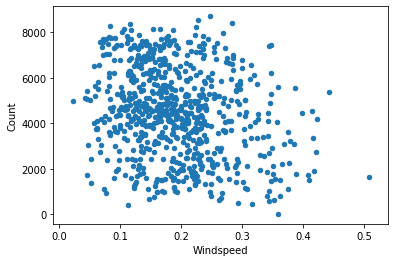

In [145]:
entireDataset.plot.scatter(x = 'Windspeed', y = 'Count') # plotting the counts based on windspeed
# Count of bikes is decreasing with increase in windspeed

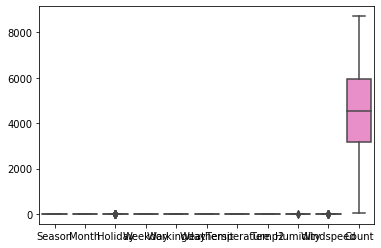

In [146]:
sns.boxplot(data = entireDataset)

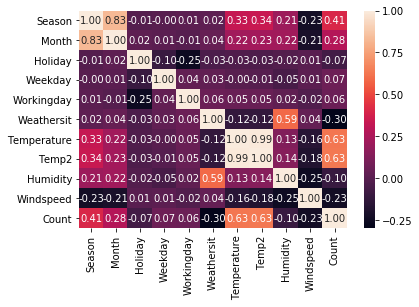

In [147]:
## Correlation matrix
# Calculate correlations
corr = entireDataset.corr()
# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

### Converting categorical variables

In [149]:
dummy_fields = ['Season', 'Weathersit', 'Holiday', 
                  'Weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(entireDataset[each], prefix=each, drop_first=False)
    entireDataset = pd.concat([entireDataset, dummies], axis=1)

fields_to_drop = ['Season', 'Weathersit', 'Holiday', 
                  'Weekday']
entireDataset = entireDataset.drop(fields_to_drop, axis=1)
entireDataset.head()

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Count,Season_1,Season_2,Season_3,...,Weathersit_3,Holiday_0,Holiday_1,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,0,0.344167,0.363625,0.805833,0.160446,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [150]:
entireDataset['Cnt'] = entireDataset['Count']

# testDataset.fillna(-1, inplace=True)
# testDataset.head(20)

In [151]:
entireDataset.drop(['Count'],axis=1,inplace=True)

In [152]:
entireDataset.rename(columns = {"Cnt": "Count"}, 
                                 inplace = True) 

In [153]:
entireDataset.head(2)

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Season_1,Season_2,Season_3,Season_4,...,Holiday_0,Holiday_1,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Count
0,1,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,...,1,0,0,0,0,0,0,0,1,985
1,1,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,...,1,0,1,0,0,0,0,0,0,801


### Splitting data into training and test set

In [154]:
seedNum = 777
totCol = len(entireDataset.columns)
array = entireDataset.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))


X_train.shape: (731, 22) Y_train.shape: (731,)
Total time for data handling and visualization: 0:00:43.072670


In [155]:
X_tr = pd.DataFrame(X_train)

In [156]:
X_tr

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.344167,0.363625,0.805833,0.160446,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.363478,0.353739,0.696087,0.248539,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.196364,0.189405,0.437273,0.248309,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.200000,0.212122,0.590435,0.160296,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.226957,0.229270,0.436957,0.186900,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,0.204348,0.233209,0.518261,0.089565,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1.0,0.196522,0.208839,0.498696,0.168726,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.165000,0.162254,0.535833,0.266804,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.138333,0.116175,0.434167,0.361950,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.150833,0.150888,0.482917,0.223267,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [157]:
X_train

array([[ 1.      ,  0.      ,  0.344167, ...,  0.      ,  0.      ,
         1.      ],
       [ 1.      ,  0.      ,  0.363478, ...,  0.      ,  0.      ,
         0.      ],
       [ 1.      ,  1.      ,  0.196364, ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [12.      ,  0.      ,  0.253333, ...,  0.      ,  0.      ,
         1.      ],
       [12.      ,  0.      ,  0.255833, ...,  0.      ,  0.      ,
         0.      ],
       [12.      ,  1.      ,  0.215833, ...,  0.      ,  0.      ,
         0.      ]])

In [158]:
# # data standardization
# from sklearn.preprocessing import StandardScaler
# feature_scaler = StandardScaler()
# X_train = feature_scaler.fit_transform(X_train)
# # X_validation = feature_scaler.transform(X_validation)

#### Different models applied

In [159]:
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt
num_folds = 10
scoring = make_scorer(mean_squared_error)

# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)))
models.append(('CART', DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)))

models.append(('KNN', KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)))
models.append(('SVM', SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)))

models.append(('RF', RandomForestRegressor(n_estimators='warn', criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)))

models.append(('AB', AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)))
models.append(('GBM', GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)))
results = []
names = []
metrics = []

prediction = []

In [160]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(mean_squared_error))   
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    error = sqrt(cv_results.mean()) #calculate rmse
    #rmse_val.append(error) #store rmse values
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
    
   
    print('RMSE value is:', error)
   
   

LR: 3059294.120083 (1080194.047399)
Model training time: 0:00:00.226872
RMSE value is: 1749.083794471486
CART: 4178949.063514 (833950.231301)
Model training time: 0:00:00.130925
RMSE value is: 2044.2477989503898
KNN: 4334873.119394 (1005618.029028)
Model training time: 0:00:00.045974
RMSE value is: 2082.035811265877
SVM: 4185234.757452 (2953823.461672)
Model training time: 0:00:00.405984
RMSE value is: 2045.7846312483184
RF: 3494415.257011 (756975.505834)
Model training time: 0:00:00.526887
RMSE value is: 1869.335512156807
AB: 2658839.698020 (536077.684119)
Model training time: 0:00:01.546127
RMSE value is: 1630.594890835752
GBM: 3459714.696754 (613218.899006)
Model training time: 0:00:01.150343
RMSE value is: 1860.0308322051314


##### Algorithm comparison - Pre tuning

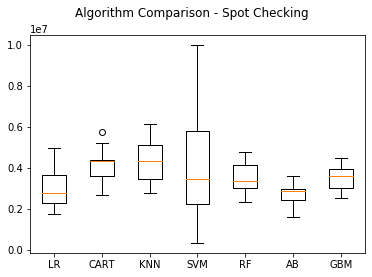

In [161]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

##### GridSearchCV applied to tune performance of model

In [162]:
results = []
names = []


In [163]:
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([400,500,600,700,800]))
model5 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)

In [164]:
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))


Best: 3774869.862587 using {'n_estimators': 800}
3673066.422787 (649977.736674) with: {'n_estimators': 400}
3698415.961213 (625455.857376) with: {'n_estimators': 500}
3741623.984581 (624934.536651) with: {'n_estimators': 600}
3768885.804132 (616163.693875) with: {'n_estimators': 700}
3774869.862587 (608180.663549) with: {'n_estimators': 800}
Model training time: 0:00:30.274647


In [165]:
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

In [166]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 2490574.416251 using {'n_estimators': 900}
2490184.532533 (648399.504674) with: {'n_estimators': 500}
2485778.487444 (651640.146673) with: {'n_estimators': 600}
2489747.721103 (655122.231878) with: {'n_estimators': 700}
2488920.812780 (654748.108042) with: {'n_estimators': 800}
2490574.416251 (655307.418423) with: {'n_estimators': 900}
Model training time: 0:00:51.026842


##### Algorithm comparison - Post tuning

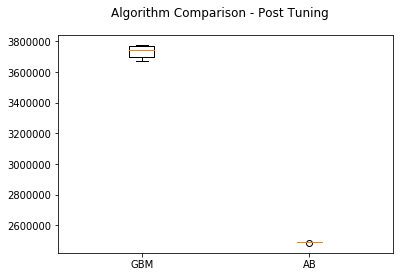

In [167]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

In [169]:
# R2 score for each algorithms
for name, model in models:
  
    model.fit(X_train, y_train)
    
    

    # Predicting the Test set results
    y_pred = model.predict(X_test)

    from sklearn.metrics import r2_score
    r2_score = r2_score(y_test, y_pred)
    msg = "R2 Score for %s is: %f " % (name, r2_score)
    print(msg)
    
    #print("R2 Score is",r2_score)
   


R2 Score for LR is: 0.597578 
R2 Score for CART is: 0.321031 
R2 Score for KNN is: 0.374144 
R2 Score for SVM is: -0.029258 
R2 Score for RF is: 0.559904 
R2 Score for AB is: 0.576772 
R2 Score for GBM is: 0.613249 


In [170]:
#y_pred
test_error = 1 - (r2_score)
test_error

0.3867512337675003

In [171]:
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [172]:
entireDataset.head(2)

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Season_1,Season_2,Season_3,Season_4,...,Holiday_0,Holiday_1,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Count
0,1,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,...,1,0,0,0,0,0,0,0,1,985
1,1,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,...,1,0,1,0,0,0,0,0,0,801


##### Applying model on demo values and checking performance

In [173]:
modelName = 'finalModel_BinaryClass.sav'
dump(model, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

# load the model from disk
loaded_model = load(modelName)
result = loaded_model.score(X_test, y_test)
print(result)

# Define new instace
# define one new instance
Xnew = [[0, 0, .33, 0.43,0.69, 1.16, 
         1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]]

# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

Total time for the script: 0:03:58.892956
0.6132487662324997
X=[0, 0, 0.33, 0.43, 0.69, 1.16, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Predicted=2094.5998264243403


In [174]:
ynew
#Stock of bikes to be maintained in inventory is around 2100.

array([2094.59982642])

## Analysis :

##### 1. I have applied all the algorithms and have trained my model on training data.I get 2 algorithms i.e. 'AdaBoost Regressor','Gradient Boosting Regressor' with a good R2 score.
##### 2. I have tuned the 2 algorithms using the hyperparameters and I find 'Gradient Boosting Regressor' model giving a better R2 score of 62. So I will be using this model for my future predictions. I have saved my model which can directly be used to make predictions on model data as shown.